# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [4]:
#app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, bins=[-1,0,2,3,5,999], retbins=False, precision=2, include_lowest=True )
#app_train['CNT_CHILDREN_GROUP'].value_counts()

In [5]:
#1
cut_rule = pd.IntervalIndex.from_tuples([(-1,0), (0, 2), (2, 5), (5,999)])
labels=["0","1-2","3-5","5+"]
x = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
x.categories=labels
app_train['CNT_CHILDREN_GROUP']=x
app_train['CNT_CHILDREN_GROUP'].value_counts()

0      215371
1-2     87868
3-5      4230
5+         42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [30]:
#2-1
"""
Your code here
"""
import pandas as pd
grp = ['CNT_CHILDREN_GROUP', 'TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.describe()

count           mean           std      min  \
CNT_CHILDREN_GROUP TARGET                                                   
0                  0       198762.0  166747.010980  1.061799e+05  25650.0   
                   1        16609.0  160804.210548  8.483011e+04  25650.0   
1-2                0        80081.0  174590.584401  1.201981e+05  26550.0   
                   1         7787.0  176115.362720  1.327159e+06  27900.0   
3-5                0         3810.0  175053.742913  1.128427e+05  29250.0   
                   1          420.0  160677.385714  1.130315e+05  36000.0   
5+                 0           33.0  139159.090909  7.112483e+04  45000.0   
                   1            9.0  180000.000000  7.377118e+04  90000.0   

                                25%       50%       75%          max  
CNT_CHILDREN_GROUP TARGET                                             
0                  0       112500.0  144000.0  202500.0   13500000.0  
                   1       112500.0  135000.0  202500.0    1890000.0  
1-2                0       112500.0  157500.0  211500.0   18000090.0  
                   1       112500.0  135000.0  202500.0  117000000.0  
3-5                0       112500.0  157500.0  202500.0    2250000.0  
                   1        96750.0  135000.0  185625.0    1350000.0  
5+                 0        90000.0  112500.0  180000.0     337500.0  
                   1       135000.0  180000.0  202500.0     315000.0

CNT_CHILDREN_GROUP:  0 TARGET:  0
Mean:  166747.0 Max:  13500000.0 Interval:  40000.0


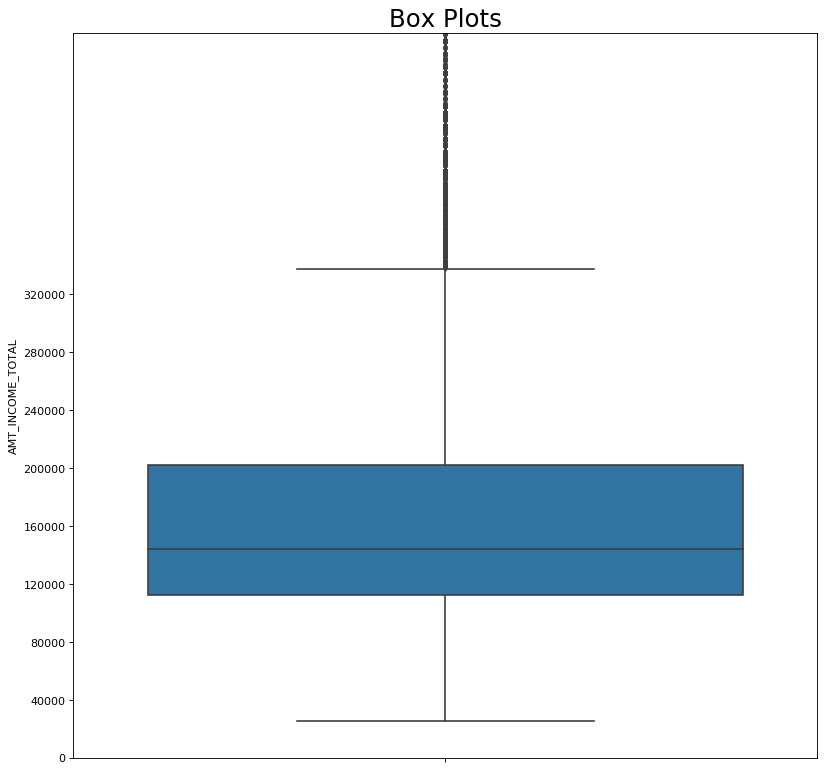

CNT_CHILDREN_GROUP:  0 TARGET:  1
Mean:  160804.0 Max:  1890000.0 Interval:  40000.0


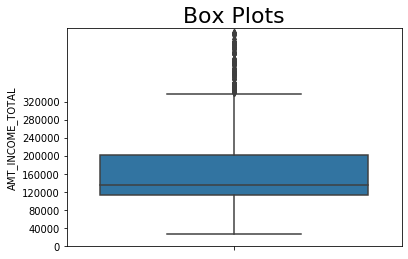

CNT_CHILDREN_GROUP:  1-2 TARGET:  0
Mean:  174591.0 Max:  18000090.0 Interval:  40000.0


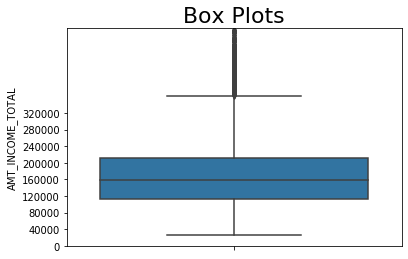

CNT_CHILDREN_GROUP:  1-2 TARGET:  1
Mean:  176115.0 Max:  117000000.0 Interval:  40000.0


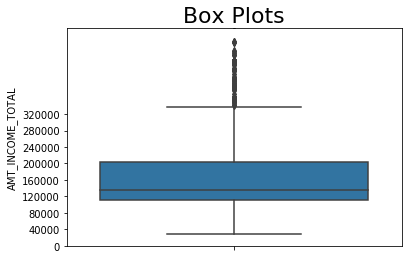

CNT_CHILDREN_GROUP:  3-5 TARGET:  0
Mean:  175054.0 Max:  2250000.0 Interval:  40000.0


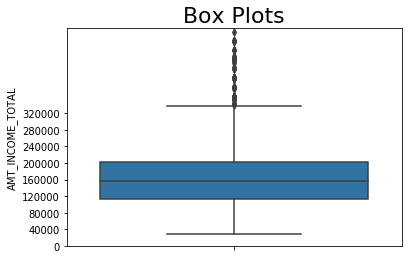

CNT_CHILDREN_GROUP:  3-5 TARGET:  1
Mean:  160677.0 Max:  1350000.0 Interval:  40000.0


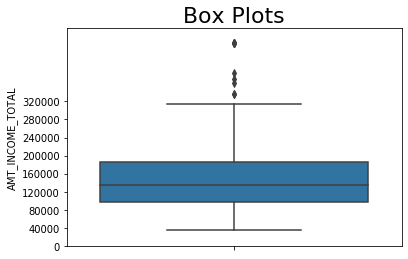

CNT_CHILDREN_GROUP:  5+ TARGET:  0
Mean:  139159.0 Max:  337500.0 Interval:  20000.0


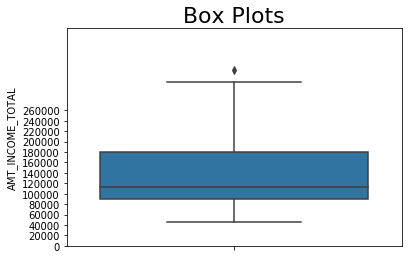

CNT_CHILDREN_GROUP:  5+ TARGET:  1
Mean:  180000.0 Max:  315000.0 Interval:  40000.0


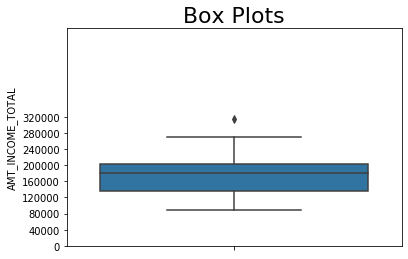

In [31]:
#2-2
import seaborn as sns
plt.figure(figsize=(12,12), dpi= 80)

import pandas as pd
z=pd.DataFrame({'grp_df' : grouped_df.size()}).reset_index()

for col in z.itertuples(index=True, name='Pandas'):
    col_df=app_train.loc[(app_train.CNT_CHILDREN_GROUP==col[1])&(app_train.TARGET==col[2])]
    y_max=col_df['AMT_INCOME_TOTAL'].max()
    y_mean=round(col_df['AMT_INCOME_TOTAL'].mean(),0)
    
    print("CNT_CHILDREN_GROUP: ", col[1], "TARGET: ",col[2])
    print("Mean: ", y_mean, "Max: ", y_max,"Interval: ", round(y_mean,-1*(len(str(y_mean))-3))/5)
    sns.boxplot( y='AMT_INCOME_TOTAL', data=col_df, notch=False)
    plt.title('Box Plots', fontsize=22)
    plt.ylim(col_df['AMT_INCOME_TOTAL'].min(), y_mean*3)
    plt.yticks(np.arange(0, y_mean*2, round(y_mean,-1*(len(str(y_mean))-3))/5))
    plt.show()

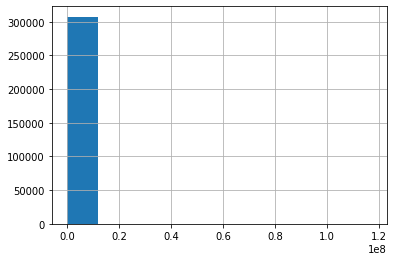

CNT_CHILDREN_GROUP:  0 TARGET:  0
Mean:  166747.0 Max:  13500000.0 Interval:  200000.0


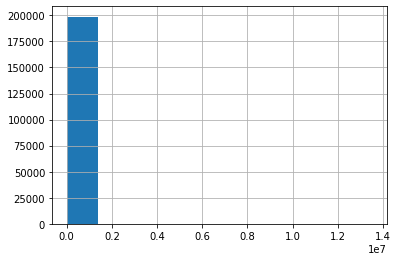

CNT_CHILDREN_GROUP:  0 TARGET:  1
Mean:  160804.0 Max:  1890000.0 Interval:  200000.0


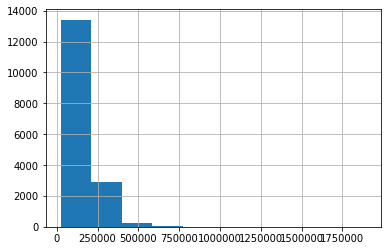

CNT_CHILDREN_GROUP:  1-2 TARGET:  0
Mean:  174591.0 Max:  18000090.0 Interval:  200000.0


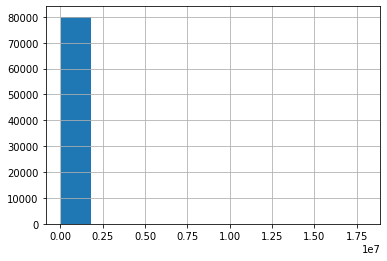

CNT_CHILDREN_GROUP:  1-2 TARGET:  1
Mean:  176115.0 Max:  117000000.0 Interval:  200000.0


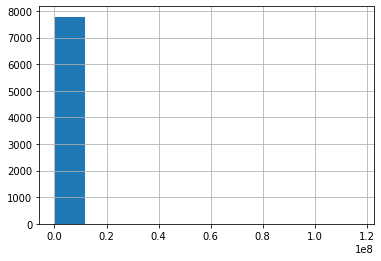

CNT_CHILDREN_GROUP:  3-5 TARGET:  0
Mean:  175054.0 Max:  2250000.0 Interval:  200000.0


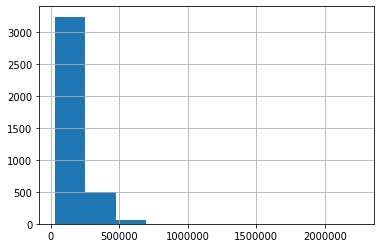

CNT_CHILDREN_GROUP:  3-5 TARGET:  1
Mean:  160677.0 Max:  1350000.0 Interval:  200000.0


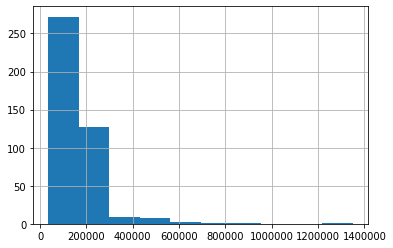

CNT_CHILDREN_GROUP:  5+ TARGET:  0
Mean:  139159.0 Max:  337500.0 Interval:  100000.0


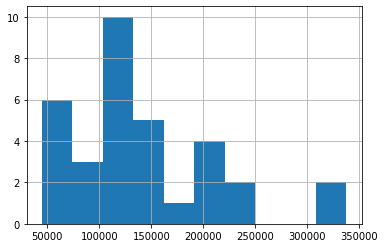

CNT_CHILDREN_GROUP:  5+ TARGET:  1
Mean:  180000.0 Max:  315000.0 Interval:  200000.0


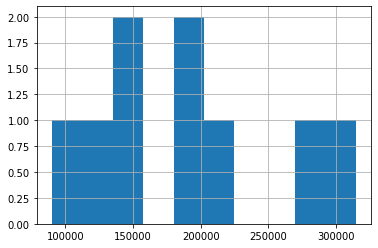

In [32]:

app_train[~app_train['AMT_INCOME_TOTAL'].isnull()]['AMT_INCOME_TOTAL'].hist(bins = 10)
plt.show()

for col in z.itertuples(index=True, name='Pandas'):
    print("CNT_CHILDREN_GROUP: ", col[1], "TARGET: ",col[2])
    col_df=app_train.loc[(app_train.CNT_CHILDREN_GROUP==col[1])&(app_train.TARGET==col[2])]
    y_max=col_df['AMT_INCOME_TOTAL'].max()
    y_min=col_df['AMT_INCOME_TOTAL'].min()    
    y_std=col_df['AMT_INCOME_TOTAL'].std()    
    y_mean=round(col_df['AMT_INCOME_TOTAL'].mean(),0) 
    print("Mean: ", y_mean, "Max: ", y_max,"Interval: ", round(y_mean,-1*(len(str(y_mean))-3)))
    col_df[~col_df['AMT_INCOME_TOTAL'].isnull()]['AMT_INCOME_TOTAL'].hist(bins = 10)
    plt.show()



In [65]:
for col in z.itertuples(index=True, name='Pandas'):
    print("CNT_CHILDREN_GROUP: ", col[1], "TARGET: ",col[2])
    col_df=app_train.loc[(app_train.CNT_CHILDREN_GROUP==col[1])&(app_train.TARGET==col[2])]
    y_max=col_df['AMT_INCOME_TOTAL'].max()
    y_min=col_df['AMT_INCOME_TOTAL'].min()    
    y_std=col_df['AMT_INCOME_TOTAL'].std()
    print(y_min,y_max,y_std)
    y_count=col_df['AMT_INCOME_TOTAL'].count()    
    y_mean=col_df['AMT_INCOME_TOTAL'].mean() 
    app_train.loc[(app_train.CNT_CHILDREN_GROUP==col[1])&(app_train.TARGET==col[2]),'Z'] = app_train.loc[(app_train.CNT_CHILDREN_GROUP==col[1])&(app_train.TARGET==col[2])]['AMT_INCOME_TOTAL'].apply(lambda x: ((x-y_mean)/y_std)) 
    check_df= app_train.loc[(app_train.CNT_CHILDREN_GROUP==col[1])&(app_train.TARGET==col[2])]
    print("SUM: ", check_df['Z'].sum(), "Row Count: ", y_count, "vs" , len(check_df['Z']),"\n")
    

CNT_CHILDREN_GROUP:  0 TARGET:  0
25650.0 13500000.0 106179.91036507228
SUM:  -2.751576744230988e-11 Row Count:  198762 vs 198762 

CNT_CHILDREN_GROUP:  0 TARGET:  1
25650.0 1890000.0 84830.10512160968
SUM:  1.7550405573274475e-12 Row Count:  16609 vs 16609 

CNT_CHILDREN_GROUP:  1-2 TARGET:  0
26550.0 18000090.0 120198.14442852495
SUM:  -5.4569682106375694e-12 Row Count:  80081 vs 80081 

CNT_CHILDREN_GROUP:  1-2 TARGET:  1
27900.0 117000000.0 1327158.6615454582
SUM:  -2.1316282072803006e-14 Row Count:  7787 vs 7787 

CNT_CHILDREN_GROUP:  3-5 TARGET:  0
29250.0 2250000.0 112842.69861317657
SUM:  2.1316282072803006e-14 Row Count:  3810 vs 3810 

CNT_CHILDREN_GROUP:  3-5 TARGET:  1
36000.0 1350000.0 113031.45632047413
SUM:  -7.105427357601002e-15 Row Count:  420 vs 420 

CNT_CHILDREN_GROUP:  5+ TARGET:  0
45000.0 337500.0 71124.83024424542
SUM:  -1.6653345369377348e-16 Row Count:  33 vs 33 

CNT_CHILDREN_GROUP:  5+ TARGET:  1
90000.0 315000.0 73771.18339839751
SUM:  0.0 Row Count:  9 vs

In [60]:
app_train[app_train.Z.notnull()]

        

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_GROUP,Z
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.491524
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.972434
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.934706
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.298993
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.426135
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0,-0.638040
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0.0,0.0,0.0,1.0,1.0,2.0,1-2,-0.029876
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.820052
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,-0.510897
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.298993
